### data ingestion

In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("../data/raw/emails.csv")

In [33]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [34]:
df.shape

(5728, 2)

In [35]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [36]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(33)

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.shape

(5695, 2)

In [40]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [41]:
df.sample

<bound method NDFrame.sample of                                                    text  spam
0     Subject: eprm article  hi vince ,  ?  as alway...     0
1     Subject: fluid analysis  our customer speak vo...     1
2     Subject: re : liquids limits oct . 20  john : ...     0
3     Subject: computer  recently a new person moved...     0
4     Subject: re : visual numerics cnl licensing is...     0
...                                                 ...   ...
5690  Subject: thomas knudsen  hi vince  i met with ...     0
5691  Subject: sevil yamin  vince ,  do you want me ...     0
5692  Subject: re : a request  zimin ,  i also enjoy...     0
5693  Subject: 6 / 30 aga forecast at 66  mike ,  my...     0
5694  Subject: perfect visual solution for your busi...     1

[5695 rows x 2 columns]>

### data preprocessing

In [42]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [43]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_email(text):
    # Lowercase
    text = text.lower()
    # Remove links (normal + obfuscated)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'h\s*t\s*t\s*p\s*s?\s*:\s*/\s*/\s*\S+', '', text, flags=re.IGNORECASE)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    words = text.split()
    # Remove stopwords + Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

In [45]:
preprocess_email("The children were running quickly and the better dogs chased them happily.")

'child running quickly better dog chased happily'

### Feature Engineering

In [46]:
X = df['text']
y = df['spam']

In [47]:
type(y)

pandas.core.series.Series

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [50]:
train_data['text'] = train_data['text'].apply(preprocess_email)

In [51]:
train_data.iloc[0].values

array(['subject genuine log home future genuine log home future western red cedar log siding basic kit builder kit precut kit custom design custom kit type log style feel find log home superior others market price structure competitive less desirable housing remember home major investment focal point family use deserve best home possible amount money spend click link catalog genuine log home accessory www genuineloghome com sale rep code bsad removed mailing please send email higher _ learningl yahoo com',
       np.int64(1)], dtype=object)

In [52]:
train_data.iloc[0].values

array(['subject genuine log home future genuine log home future western red cedar log siding basic kit builder kit precut kit custom design custom kit type log style feel find log home superior others market price structure competitive less desirable housing remember home major investment focal point family use deserve best home possible amount money spend click link catalog genuine log home accessory www genuineloghome com sale rep code bsad removed mailing please send email higher _ learningl yahoo com',
       np.int64(1)], dtype=object)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [54]:
X_train = train_data['text']
X_test = test_data['text']
y_train = train_data['spam']
y_test = test_data['spam']
x_train_bow = vectorizer.fit_transform(X_train)
x_test_bow = vectorizer.transform(X_test)

In [55]:
train_df = pd.DataFrame(x_train_bow.toarray())
train_df['spam'] = y_train

In [56]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,spam
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


### mlflow on dagshub

In [57]:
import dagshub
dagshub.init(repo_owner='rk2289868', repo_name='email-spam-detection', mlflow=True)


Accessing as rk2289868

Initialized MLflow to track repo "rk2289868/email-spam-detection"

Repository rk2289868/email-spam-detection initialized!

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

mnb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


In [59]:
models = [mnb, lr, rf, gb]

Model: MultinomialNB, accuracy_score: 0.9683933274802459
🏃 View run hilarious-stag-324 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/1/runs/67a344f8d8c84071bc6332846885bda0
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/1
Model: LogisticRegression, accuracy_score: 0.9868305531167691
🏃 View run defiant-midge-150 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/1/runs/16185fecf27d4567a7d36e17b2889700
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/1
Model: RandomForestClassifier, accuracy_score: 0.9789288849868305
🏃 View run bald-snake-861 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/1/runs/9146db87b3a84f4cadb3ad3bdabb62a4
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/1
Model: GradientBoostingClassifier, accuracy_score: 0.9780509218612818
🏃 View run magnificent-r

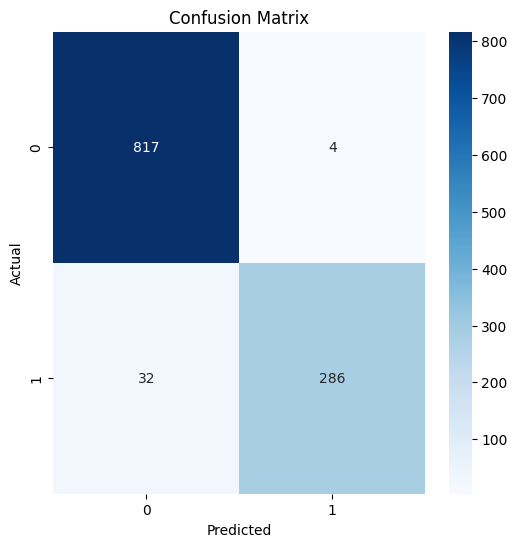

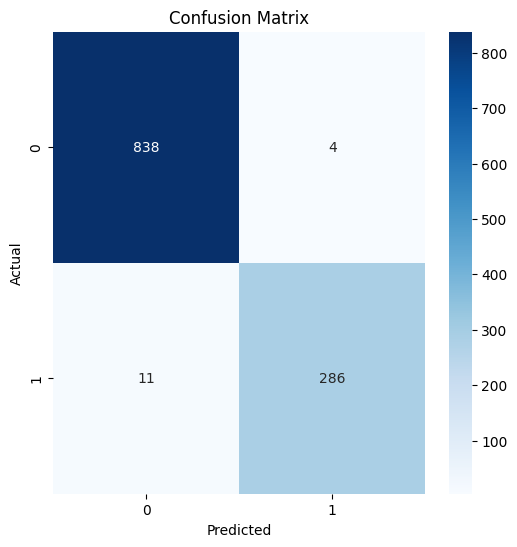

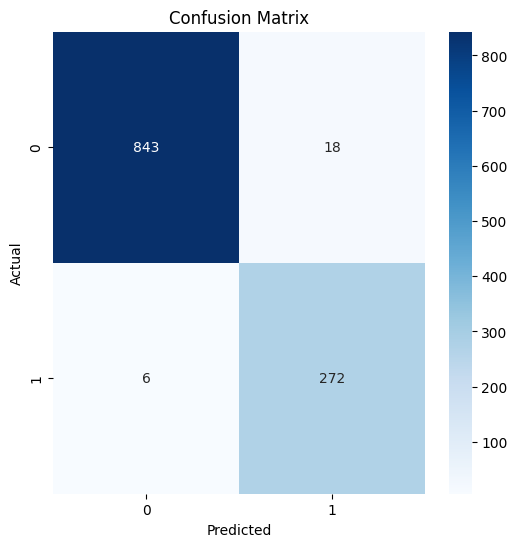

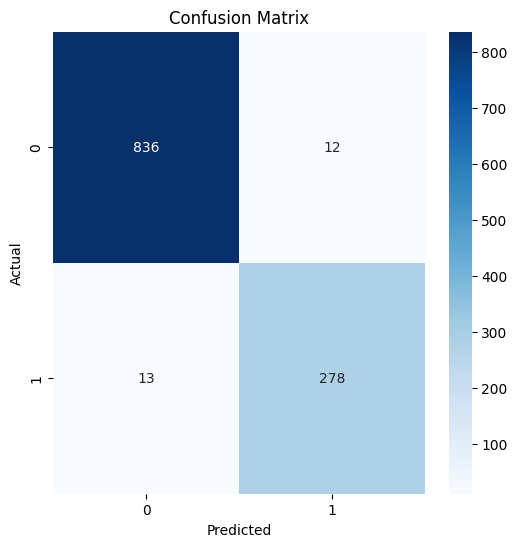

In [60]:
import mlflow
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mlflow.set_experiment("baseline_experiment")
with mlflow.start_run() as parent:

    for model in models:
        with mlflow.start_run(nested=True) as child:
            model.fit(X_train_vectorized, y_train)
            y_pred = model.predict(X_test_vectorized)
            score = accuracy_score(y_pred, y_test)
            mlflow.log_metric("accuracy_score", score)

            # create a confusion matrix plot
            cm = confusion_matrix(y_pred, y_test)
            plt.figure(figsize=(6,6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.title('Confusion Matrix')

            # first we will save the plot as an artifact
            plt.savefig("confusion_matrix_{}.png".format(model.__class__.__name__))

            # then log this image
            mlflow.log_artifact("confusion_matrix_{}.png".format(model.__class__.__name__))
            
            print("Model: {}, accuracy_score: {}".format(model.__class__.__name__,score))


In [61]:
param_grid = {
    "max_depth": [None, 5, 10, 20],
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 3, 4]
}

In [62]:
from sklearn.model_selection import GridSearchCV
import mlflow.sklearn
mlflow.set_experiment("RandomForest")

with mlflow.start_run() as parent:
    rf = RandomForestClassifier(random_state=42)
    model = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    model.fit(X_train_vectorized, y_train)

    for i in range(len(model.cv_results_['params'])):

        with mlflow.start_run(nested=True) as child:
            mlflow.log_params(model.cv_results_['params'][i])
            mlflow.log_metric("accuracy", model.cv_results_['mean_test_score'][i])

    best_params = model.best_params_
    best_score = model.best_score_

    # log params
    mlflow.log_params(best_params)

    # log metric
    mlflow.log_metric("accuracy", best_score)

    # log data
    train_df = pd.DataFrame(X_train, columns=['text'])
    train_df['spam'] = y_train

    test_df = pd.DataFrame(X_test, columns=['text'])
    test_df['spam'] = y_test

    train_df_format = mlflow.data.from_pandas(train_df)
    test_df_format = mlflow.data.from_pandas(test_df)

    mlflow.log_input(train_df_format, "training_data")
    mlflow.log_input(test_df_format, "testing_data")

    # log model
    # mlflow.sklearn.log_model(model.best_estimator_, artifact_path="model")

    # set tag
    mlflow.set_tag("author", "Rohit")

    print("Best Score: ", best_score)
    print("Best Params: ", best_params)



🏃 View run casual-chimp-19 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2/runs/5969c5ee50204c68a73f6d6f9644b9f8
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2
🏃 View run unleashed-kit-244 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2/runs/0bac3f9dd1d64d978eb0cd7003dd801a
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2
🏃 View run fearless-gnu-979 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2/runs/76b6ad203a614751b09e4a66c48df4a8
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2
🏃 View run suave-whale-559 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2/runs/34496d60690b4e64ab72d70950be2288
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2
🏃 View run wise-bug-942 at: https://dagsh

f:\email-spam-detection\myenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best Score:  0.9830991102894447
Best Params:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
🏃 View run rare-bug-240 at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2/runs/aa9f9ae9d9a9445482c49015e494ac9c
🧪 View experiment at: https://dagshub.com/rk2289868/email-spam-detection.mlflow/#/experiments/2
